<a href="https://colab.research.google.com/github/ignyz/Numerical-methods-and-algorithms/blob/main/L3_1_interpoliavimas_daugianariu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-3. -2. -1.  0.  1.  2.] 

Gauss [[-0.00073134]
 [-0.09062377]
 [-0.64465738]
 [ 0.19009116]
 [ 0.11672002]
 [-0.10069287]]  GAUSS 

[[  1.   0.   0.   0.   0.   0.]
 [  1.   1.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   0.]
 [  1.   3.   6.   6.   0.   0.]
 [  1.   4.  12.  24.  24.   0.]
 [  1.   5.  20.  60. 120. 120.]]
[[-7.31342548e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.13551146e-02 -9.06237720e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.47129365e+00 -1.37993853e+00 -6.44657379e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.00000000e+00 -1.52870635e+00 -7.43839119e-02  1.90091156e-01
   0.00000000e+00  0.00000000e+00]
 [-7.35646823e-01  2.26435318e+00  1.89652977e+00  6.56971226e-01
   1.16720018e-01  0.00000000e+00]
 [-1.82710229e-02  7.17375800e-01 -7.73488689e-01 -8.90006152e-01
  -3.86744344e-01 -1.00692872e-01]] 

[[-7.31342548e-04  0.00000000e+00  0.00000000e+00  0.00000

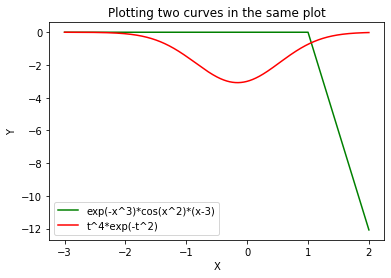

In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy 
import math
import matplotlib.pyplot as plt
import time
import sympy as sym
from numpy import *
from matplotlib.pyplot import *
def coef(x,y) :
    ''' x : array of data points
       y : array of f(x)'''

    x.astype(float)
    y.astype(float)
    n = len(x)
    F = zeros((n,n), dtype=float)
    b = zeros(n) 
  #  print(x)
    for i in range(0,n):
       # print("iteracija ", i, " Priskiriam", y[i])
        F[i,0]=y[i]



    for j in range(1, n):
        for i in range(j,n):
            F[i,j] = float(F[i,j-1]-F[i-1,j-1])/float(x[i]-x[i-j])

    #print("Hmmmm",F)
    for i in range(0,n):
        b[i] = F[i,i]

    return np.array(b) # return an array of coefficient

def Eval(a, x, r):

    '''  a : array returned by function coef()
        x : array of data points
        r : the node to interpolate at
    '''

    x.astype(float)
    n = len( a ) - 1
    temp = a[n] + (r - x[n])
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp # return the y_value interpolation

def f(x): # pagaminimo kaina  = C(l) = ( l - a ) ^ 2
  
  return (math.cos(math.radians(x**2)) * (x - 3))*(math.exp(-1*x**2))
  

def calculateDistance(x1,y1,x2,y2):  
  dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
  return dist  

xmin=-3.
xmax=2.
N = 6
deltax =calculateDistance(xmin,0,xmax,0) / (N-1) 
X=zeros(N)
XC=zeros(N, dtype=float)
Y=zeros(N)
YC=zeros(N, dtype=float)

xnow  = xmin

for ii in range(N):
  X[ii] = xnow
  Y[ii] = f(xnow)
  #print("xxnow",xnow , " YYnow", f(xnow))
  #XC[ii] = (b-a)/2*cos(pi*(2*i+1)/(2*n)) + (b+a)/2
  XC[ii] = math.cos(math.pi*(2*ii+1)/(2*N))
  YC[ii] = f(XC[ii])
  xnow = xnow + deltax
Y = numpy.reshape(Y,(N,1))
#YYY = np.reshape(Y, -6)
#print(numpy.reshape(Y,(N,1)))
print(X,"\n")
#print(XC,"\n") # tolygiu interpoliavimo tasku abscises
#print(Y,"\n", YYY , "\n") # tolygiai paskirstytu interpoliavimo tasku ordinates
#print(YC,"\n") #
A=zeros((N,N), dtype=float)
AC=zeros((N,N), dtype=float)

for i in range(0,N):
  A[i,0]= 1
  AC[i,0]= 1
  for j in range(1,i+1):
    A[i,j] = (X[i]-X[j-1]) * A[i,j-1]
    AC[i,j] = (XC[i]-XC[j-1]) * AC[i,j-1]
  #  print(X[i] , " - " , X[j-1])

print("Gauss",gausElimination(A,Y)," GAUSS \n") #
print(A)
#print(np.transpose(Y))
#print(AC)

#print(gausElimination( A, np.transpose(Y)))
######### Niutono išraiška interpoliuojančiam daugianariui apskaičiuoti

F=zeros((N,N), dtype=float)
FC=zeros((N,N), dtype=float)
for i in range(0,N):
  F[i,0]=Y[i]
  FC[i,0]=Y[i]
for j in range(1,N):
  for i in range(j,N):
    F[i,j] = float(float(F[i,j-1]-F[i-1,j-1]) / float(X[i]-X[i-j])) 
    FC[i,j] = float(float(FC[i,j-1]-FC[i-1,j-1]) / float(XC[i]-XC[i-j])) 
   # print(F[i,j]," = ",F[i,j-1] ,"-",F[i-1,j-1],"/ (", X[i] ,"-", X[i-j],")"  )
  #print("next")
print(F,"\n")
print(FC)
############

F1 = F.copy()
FC1 = FC.copy()
for j in range(1,N):
  for i in range(j,N):
    F1[i,j] = float(F[i,j]) * float(A[i,j])
    FC1[i,j] = float(FC[i,j]) * float(AC[i,j])
#print(F1)

########### SUMUOJAME NIUTONO INTERPOLIAVIMO KOEFICIENTUS ###########
b=zeros(N)
for l in range(N):
  b[i]=F1[i,i]

print("\n",F1.sum(axis=1, dtype='float'))
F2 = F1.sum(axis=1, dtype='float')
#print("\n",FC1.sum(axis=1, dtype='float'))
FC2 = FC1.sum(axis=1, dtype='float')

############ GRAFIKU PAISYMAS ##########

t = linspace(-3, 2, 5000)

y1 = zeros(len(t))
z = linspace(-3, 2, 6)
zy2 =zeros(len(FC2))
y3=zeros(len(F2))
#y2 = zeros(len(tF2
y1 = zeros(len(t))
for i in range(len(t)):
    y1[i] = f(t[i])
for i in range(len(FC2)):
  y2[i] = FC2[i]

#for i in range(len(t)):
#    y2[i] = Eval(coef(X,Y),t,i)

for i in range(len(FC2)):
    y2[i] = Eval(coef(XC,YC),t,i)
for i in range(len(F2)):
  y3[i] = b[i]

#plot(z, y2, 'b-')
show()
plot(z, y3,'g-')
#plot(t, y2, 'b-')
plot(t, y1, 'r-')
xlabel('X')
ylabel('Y')
legend(['exp(-x^3)*cos(x^2)*(x-3)', 't^4*exp(-t^2)'])
title('Plotting two curves in the same plot')

show()

[-3. -2. -1.  0.  1.  2.] 

[[  1.   0.   0.   0.   0.   0.]
 [  1.   1.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   0.]
 [  1.   3.   6.   6.   0.   0.]
 [  1.   4.  12.  24.  24.   0.]
 [  1.   5.  20.  60. 120. 120.]]
[-0.00073134 -0.09062377 -0.64465738  0.19009116  0.11672002 -0.10069287]
[-7.31342548e-04  3.50143367e-01 -3.85811533e+00 -3.25580800e+00
  1.50162620e+00  5.46972542e+00]
[-0.00073134 -0.09062377 -0.64465738  0.19009116  0.11672002 -0.10069287]


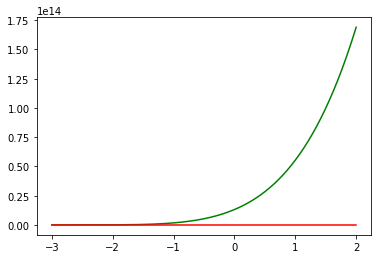

In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy 
import math
import matplotlib.pyplot as plt
import time
import sympy as sym
from numpy import *
from matplotlib.pyplot import *



def Eval(a, x, r):

    '''  a : retorno de la funcion coeficiente() 
         x : abcisas x_i
         r : abcisa a interpolar
    '''

    x.astype(float)
    n = len( a ) - 1
    temp = a[n]
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp # return the y_value interpolation

def f(x): # pagaminimo kaina  = C(l) = ( l - a ) ^ 2
  
  return (math.cos(math.radians(x**2)) * (x - 3))*(math.exp(-1*x**2))
  

def calculateDistance(x1,y1,x2,y2):  
  dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
  return dist  

xmin=-3.
xmax=2.
N = 6
deltax =calculateDistance(xmin,0,xmax,0) / (N-1) 
X=zeros(N)
XC=zeros(N, dtype=float)
Y=zeros(N)
YC=zeros(N, dtype=float)

xnow  = xmin

for ii in range(N):
  X[ii] = xnow
  Y[ii] = f(xnow)
  XC[ii] = math.cos(math.pi*(2*ii+1)/(2*N))
  YC[ii] = f(XC[ii])
  xnow = xnow + deltax
Y = numpy.reshape(Y,(N,1))
print(X,"\n")
#print(XC,"\n") # tolygiu interpoliavimo tasku abscises
#print(Y,"\n", YYY , "\n") # tolygiai paskirstytu interpoliavimo tasku ordinates
#print(YC,"\n") #
A=zeros((N,N), dtype=float)
AC=zeros((N,N), dtype=float)

for i in range(0,N):
  A[i,0]= 1
  AC[i,0]= 1
  for j in range(1,i+1):
    A[i,j] = (X[i]-X[j-1]) * A[i,j-1]
    AC[i,j] = (XC[i]-XC[j-1]) * AC[i,j-1]

print(A)
######### Niutono išraiška interpoliuojančiam daugianariui apskaičiuoti

F=zeros((N,N), dtype=float)
FC=zeros((N,N), dtype=float)
for i in range(0,N):
  F[i,0]=Y[i]
  FC[i,0]=Y[i]

for j in range(1,N):
  for i in range(j,N):
    F[i,j] = float(float(F[i,j-1]-F[i-1,j-1]) / float(X[i]-X[i-j]))
    FC[i,j] = float(float(FC[i,j-1]-FC[i-1,j-1]) / float(XC[i]-XC[i-j])) 
  
  
b=zeros(N, dtype=float)
bc=zeros(N, dtype=float)
for i in range(0,N):
  b[i] = F[i,i]
  bc[i] = FC[i,i]
print(b)



############ GRAFIKU PAISYMAS ##########
t = linspace(-3, 2, 500)
y1 = zeros(len(t))
y2 =zeros(len(t))
for i in range(len(t)):
    y1[i] = Eval(bc,XC,i)
for i in range(len(t)):
    y2[i] = Eval(b1,XC,i)

y = zeros(len(t))
for i in range(len(t)):
    y[i] = f(t[i])

plot(t, y1, 'g-')

#show()
#plot(t, y2, 'b-')
plot(t, y, 'r-')
print(bc)
print(b)
show()



In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import math


def gausElimination(A,b): 
  n = A.shape[1]
  nb = b.shape[1]#print(nb)#print(n)
  A1 = np.hstack((A, b))#print(A1)
  for i in range(0, n-1):
      for j in range(i + 1, n):        #A1(j,i+1:n+nb)=A1(j,i+1:n+nb)-A1(i,i+1:n+nb)*A1(j,i)/A1(i,i);
          A1[j, i + 1:n + nb] = A1[j, i + 1:n + nb] - (A1[i, i + 1:n + nb] * A1[j, i]) / A1[i, i]
          A1[j, i] = 0
     # print("\n",i,":--------------------------------------------------------------\n")
     # print(A1)
  s = (n, nb)
  x=np.zeros(s)
  x[n-1] =(A1[n-1,n])/A1[n-1,n-1] 
  for i in range(n-1,-1,-1):
    k= 0
    for j in range(i+1,n):
      k = k + (A1[i,j]*x[j])
    x[i] =(A1[i,n]-k)/A1[i,i]

  return x